## Import libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

try:
    import sklearn
    print(sklearn.__version__)
    if (sklearn.__version__ < '1.3.0'): #update for latest scikit-learn version
        !pip install -U --user scikit-learn
except Exception as e:
    !pip install scikit-learn

1.4.1.post1


## Import datasets into dataframes
Add columns to dataframes that don't have them.

In [2]:
stats_2016 = pd.read_csv('trank_data_2016.csv')
stats_2017 = pd.read_csv('trank_data_2017.csv')
stats_2018 = pd.read_csv('trank_data_2018.csv')
stats_2019 = pd.read_csv('trank_data_2019.csv')
stats_2021 = pd.read_csv('trank_data_2021.csv')
stats_2022 = pd.read_csv('trank_data_2022.csv')
stats_2023 = pd.read_csv('trank_data_2023.csv')

tourney_results = pd.read_csv('TourneyResults.csv')

column_names = ['TEAM', 'ADJOE', 'ADJDE', 'BARTHAG', 'REC', 'WINS', 'GAMES', 'EFG%', 'EFGD%', 'FTR', 'FTRD',
                'TOR', 'TORD', 'ORB', 'DRB', '?', '2P%', '2P%D', '3P%', '3P%D', 'BLOCK%', 'BLOCK%O', 
                'AST.RATE', 'AST.RATE.D', '3PR', '3PRD', 'ADJT', 'NA1', 'NA2', 'NA3', 'YEAR', 'NA4', 'NA5', 'NA6', 
                'WAB', 'FT%', 'FT%D']
stats_2016.columns = column_names
stats_2017.columns = column_names
stats_2018.columns = column_names
stats_2019.columns = column_names
stats_2021.columns = column_names
stats_2022.columns = column_names
stats_2023.columns = column_names

stats_2023.head()

,TEAM,ADJOE,ADJDE,BARTHAG,REC,WINS,GAMES,EFG%,EFGD%,FTR,...,NA1,NA2,NA3,YEAR,NA4,NA5,NA6,WAB,FT%,FT%D
0,Arkansas Pine Bluff,93.212025,105.523018,0.193629,6–21,6,27,45.2,51.4,33.8,...,NaN,NaN,NaN,2023,NaN,NaN,NaN,-15.387758,74.1,71.5
1,Portland St.,101.954400,106.576455,0.375223,10–19,10,29,49.6,55.0,34.8,...,NaN,NaN,NaN,2023,NaN,NaN,NaN,-12.877091,73.2,74.1
2,Indiana,112.525533,95.838230,0.863652,22–11,22,33,53.8,47.3,30.1,...,NaN,NaN,NaN,2023,NaN,NaN,NaN,3.425927,71.2,70.5
3,North Carolina St.,112.991820,97.803290,0.840252,23–10,23,33,51.8,49.8,25.3,...,NaN,NaN,NaN,2023,NaN,NaN,NaN,1.128087,72.0,73.4
4,Central Michigan,91.680631,106.679279,0.149004,8–21,8,29,46.5,51.9,36.9,...,NaN,NaN,NaN,2023,NaN,NaN,NaN,-15.343291,70.4,67.7


## Combine dataframes into one
This will give me all teams that made the tournament in the last two years, including their pre-tournament statistics and tournament results.

In [3]:
all_stats = pd.concat([stats_2016, stats_2017, stats_2018, stats_2019, stats_2021, stats_2022, stats_2023], ignore_index=True)
all_data = pd.merge(all_stats, tourney_results, on=['TEAM', 'YEAR'], how='inner')
all_data = all_data.drop(['NA1', 'NA2', 'NA3', 'NA4', 'NA5', 'NA6'], axis = 1)
all_data['CHAMPION'] = (all_data['ROUND'] == 1)
all_data['FINAL_FOUR'] = (all_data['ROUND'] == 1) | (all_data['ROUND'] == 2) | (all_data['ROUND'] == 4)

In [4]:
mask1 = all_data['FINAL_FOUR'] == True

minoff = min(all_data[mask1]['ADJOE'])
maxdef = max(all_data[mask1]['ADJDE'])

mask2 = (all_data['ADJOE'] >= minoff) & (all_data['ADJDE'] <= maxdef)

filtered_data = all_data[mask2]

mask3 = filtered_data['FINAL_FOUR'] == True

print(minoff, maxdef, filtered_data[mask3].shape)

105.20072943861 101.37785322627 (28, 38)


## Create Visualizations

/Users/cameronmorgan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/cameronmorgan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/cameronmorgan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/cameronmorgan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/cameronmorgan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/cameronmorgan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserW

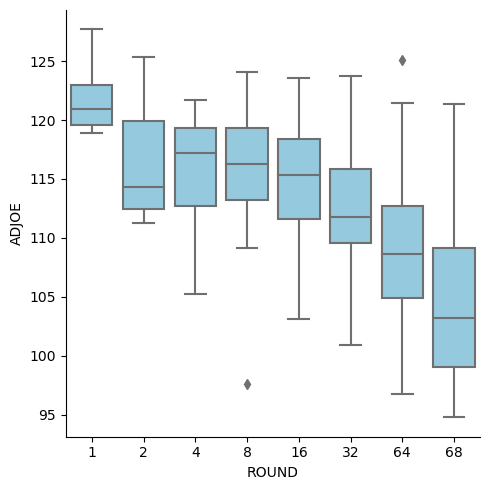

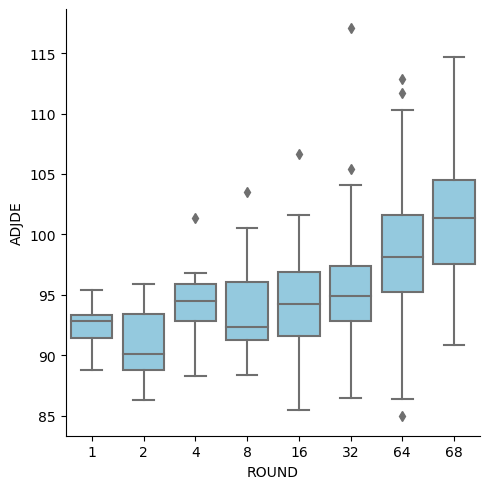

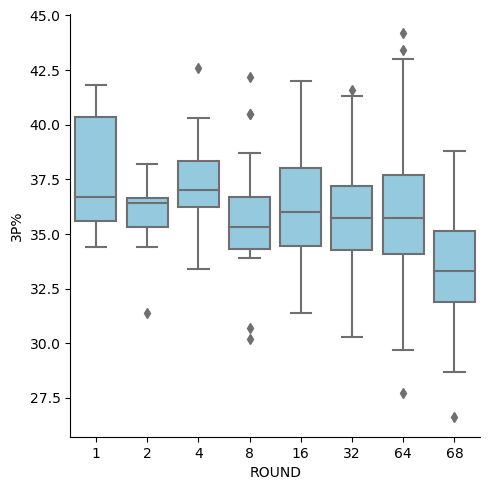

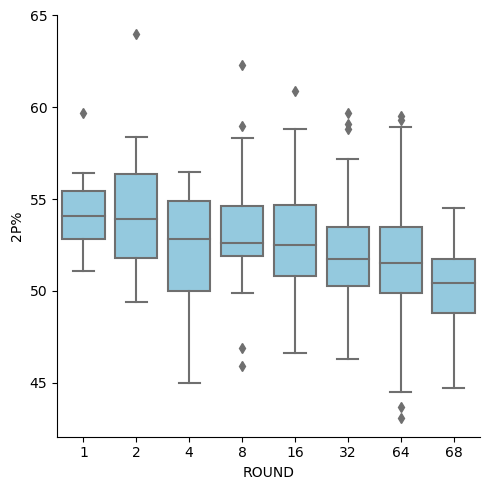

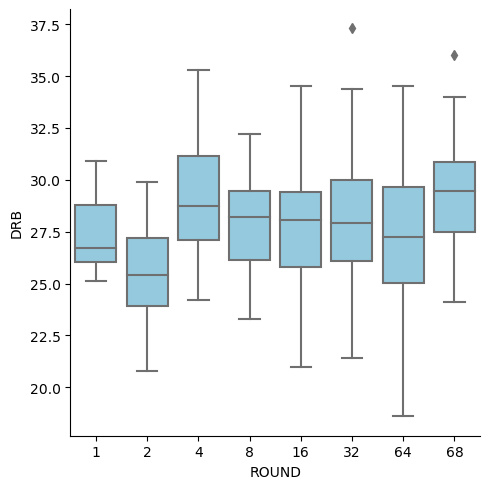

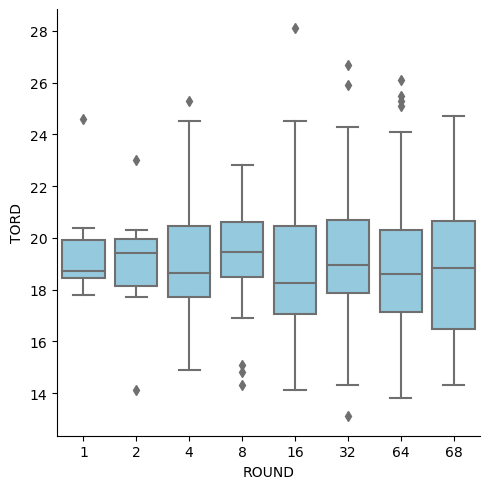

In [5]:
sns.catplot(data=all_data,x='ROUND', y='ADJOE', kind='box', color = "skyblue")
sns.catplot(data=all_data,x='ROUND', y='ADJDE', kind='box', color = "skyblue")
sns.catplot(data=all_data,x='ROUND', y='3P%', kind='box', color = "skyblue")
sns.catplot(data=all_data,x='ROUND', y='2P%', kind='box', color = "skyblue")
sns.catplot(data=all_data,x='ROUND', y='DRB', kind='box', color = "skyblue")
sns.catplot(data=all_data,x='ROUND', y='TORD', kind='box', color = "skyblue")

## K-neighbors tests

In [6]:
data = filtered_data[['ADJOE', 'ADJDE','ADJT','BARTHAG']]
target = filtered_data["ROUND"]
train_data, test_data, train_target, test_target = train_test_split(
    data, target, test_size=0.25, random_state=999)

nvalues_to_try = {'n_neighbors': range(2, 13)}
knn_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=nvalues_to_try)
knn_search.fit(train_data, train_target)
best_n = knn_search.best_params_['n_neighbors']

accuracy_model1 = knn_search.score(test_data, test_target)


print("The best n-value is", best_n)
print("The accuracy is", accuracy_model1)

/Users/cameronmorgan/.local/lib/python3.11/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


The best n-value is 6
The accuracy is 0.37209302325581395


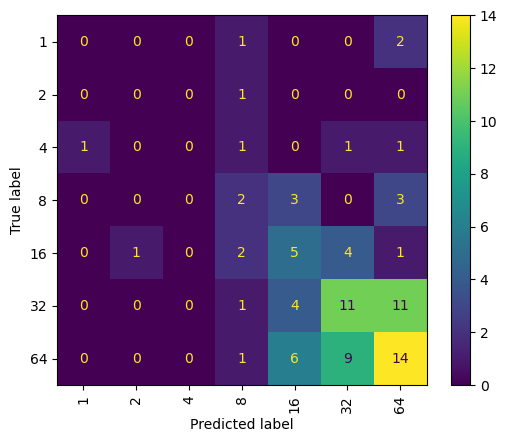

In [7]:
ConfusionMatrixDisplay.from_estimator(estimator=knn_search, X=test_data, y=test_target)
plt.xticks(rotation=90)
plt.grid(False)